<a href="https://colab.research.google.com/github/KashishTiwari-17/OIBSIP_Data-science_task4/blob/main/task_4%5Bspam_detection%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Accuracy: 0.968609865470852
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115



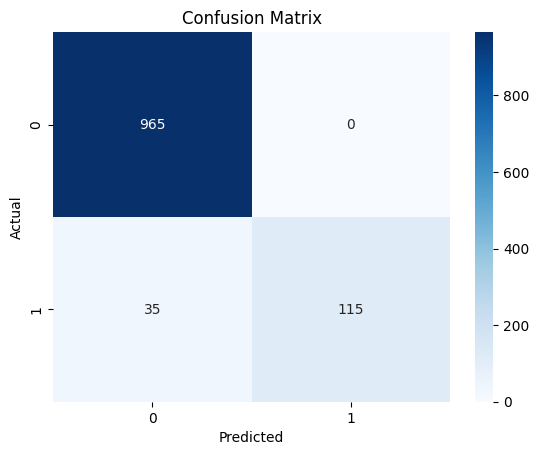

Model saved as 'spam_detector_model.pkl'

📧 Email Spam Detector

Enter email text to classify (or type 'exit' to quit):
Congratulations! You've won a free ticket. Click now to claim.
Result: 🚨 Spam

Enter email text to classify (or type 'exit' to quit):
exit
Goodbye! 👋


In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import joblib
import re

# Step 2: Load Dataset
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df = df.rename(columns={'v1': 'label', 'v2': 'text'})[['label', 'text']]  # keep only necessary columns
print(df.head())

# Step 3: Convert labels to binary (ham = 0, spam = 1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Step 4: Text Preprocessing Function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces
    return text

df['clean_text'] = df['text'].apply(clean_text)

# Step 5: Train-Test Split
X = df['clean_text']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create Pipeline with TF-IDF and Naive Bayes
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

# Step 7: Train Model
model.fit(X_train, y_train)

# Step 8: Evaluate Model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 9: Save the Model
joblib.dump(model, 'spam_detector_model.pkl')
print("Model saved as 'spam_detector_model.pkl'")
# Load the saved model
model = joblib.load('spam_detector_model.pkl')

def classify_user_email():
    print("\n📧 Email Spam Detector")
    while True:
        user_email = input("\nEnter email text to classify (or type 'exit' to quit):\n")
        if user_email.lower() == 'exit':
            print("Goodbye! 👋")
            break

        cleaned_input = clean_text(user_email)
        prediction = model.predict([cleaned_input])[0]
        result = "🚨 Spam" if prediction == 1 else "✅ Not Spam"
        print(f"Result: {result}")

# Run the classifier
classify_user_email()
